## Importing Library

In [22]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

## Import the data

In [23]:
df = pd.read_csv('Country clusters.csv')

In [24]:
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    6 non-null      object 
 1   Latitude   6 non-null      float64
 2   Longitude  6 non-null      float64
 3   Language   6 non-null      object 
dtypes: float64(2), object(2)
memory usage: 320.0+ bytes


## EDA

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

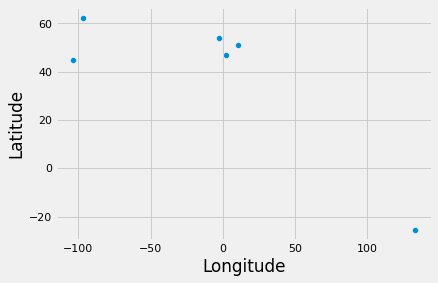

In [26]:
sns.scatterplot(df['Longitude'],df['Latitude'])

### Choosing the Latitude and longituder

In [27]:
x= df[['Latitude','Longitude']]

In [28]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Scaling the data

In [29]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x=sc.fit_transform(x)

## K means 

In [30]:
from sklearn.cluster import KMeans

In [31]:
km = KMeans(n_clusters=3)

In [32]:
km.fit(x)

KMeans(n_clusters=3)

In [33]:
centroid= km.cluster_centers_
centroid

array([[-2.19463851,  1.80593003],
       [ 0.39738895,  0.16401816],
       [ 0.50123584, -1.14899226]])

In [34]:
cluster = km.predict(x)
cluster

array([2, 2, 1, 1, 1, 0])

In [35]:
df_new = df.copy()
df_new['cluster']= cluster
df_new

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

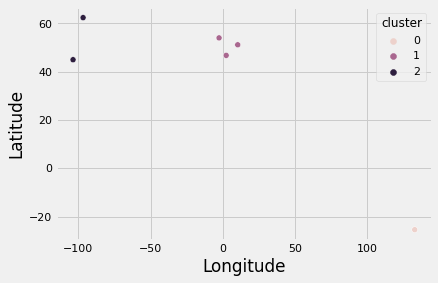

In [36]:
sns.scatterplot(df_new['Longitude'],df_new['Latitude'],hue=df_new['cluster'])